In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn import metrics


import copy

In [2]:
df = pd.read_csv('data.csv')
df.head()

,index,totalCarNumber,numberOfTrips,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,0,450,935,1.857492,1.450963,2.326227,2.884755
1,1,450,1344,1.865233,1.484508,2.317638,2.863874
2,2,450,1337,1.884717,1.477306,2.334301,2.895357
3,3,450,1307,1.864818,1.464328,2.306576,2.851668
4,4,450,1349,1.857210,1.504306,2.293485,2.838887


In [3]:
data_split_modified_z = df[['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead', 'totalCarNumber', 'index']].copy()
# data_split_modified_z = data_split_modified_z.iloc[:144, :]
data_split_modified_z = data_split_modified_z.to_numpy()
# data_split_modified_z_12 = data_split_modified_z.to_numpy()


# """ SIZE 12 """
data_split_modified_z_12 = np.split(data_split_modified_z, 16)
indexes = [] 

for d in range(len(data_split_modified_z_12)):
    ind = []
    k = len(data_split_modified_z_12[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z_12[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z_12[d])):
            modified_z_score = 0.6745 * (data_split_modified_z_12[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z_12[d] = np.delete(data_split_modified_z_12[d], ind, axis=0)
#     print('Outliers detected: ' + str((k - len(data_split_modified_z_12[d]))))

# data_split_modified_z_12 = np.concatenate(data_split_modified_z_12, axis=0)

In [4]:
# list_of_dfs = np.split(data_split_modified_z_12, 10) # split data to make the stream
k_np = data_split_modified_z_12[0] # this numpy array is used for the initial k-means
list_of_dfs_rest = data_split_modified_z_12[1:8] # this data will be clustered using sequential k-means

k = 4

In [5]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum(point1 - point2)**2)

In [6]:
def plot_iteration(data, labels, centrois, iteration):
    
    axes_labels = ['median_overhead', 'q1_overhead', 'q3_overhead', 'p9_overhead',]
    axes_feats = [[(0,1),(0,3),(0,2)],
                  [(1,3),(1,2),(2,3)],
                 ]
    nrows = 2
    ncols = 3
    figure, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(13,7))
    figure.suptitle(f'iteration {iteration}', fontsize= 16)
    for row in range(nrows):
        for col in range(ncols):
            feat = axes_feats[row][col]
            figure.tight_layout(rect=[0, 0.03, 1, 0.95])
            axs[row, col].scatter(data[:, feat[0]], data[:, feat[1]],  c=labels, cmap='rainbow', alpha=0.7)
            axs[row, col].set_ylabel(axes_labels[feat[1]])
            axs[row, col].set_xlabel(axes_labels[feat[0]])
            for i in range(len(centroids)):
                axs[row, col].scatter(centroids[i, feat[0]], centroids[i, feat[1]], c='black', marker='x')
                
    plt.show(figure)
    plt.close(figure)

In [7]:
def add_new_instance(means, counts, k, instance):
    # based on pseudo code from https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm
    
    # distancec of one point to the two clusters
    distance_instance_to_clusters = np.zeros(k)
    
    for i in range(k):
        # calculate the distance to each of the cluster means 
        distance_instance_to_clusters[i] = euclidean_distance(means[i], instance)
    
    closest_cluster = np.argmin(distance_instance_to_clusters)
    
    counts[closest_cluster] += 1
    
    means[closest_cluster] = means[closest_cluster] + (1 / counts[closest_cluster]) * (instance - means[closest_cluster])
    
    return closest_cluster, means, counts

In [8]:
def predict(centroids, data):
    distance_instance_to_clusters = np.zeros((len(data), k))
    for instance in range(len(data)):
        for cluster in range(k):
            distance_instance_to_clusters[instance, cluster] = euclidean_distance(data[instance, :-2], centroids[cluster])
        labels[instance] = np.argmin(distance_instance_to_clusters[instance])
    return labels 

In [9]:
def plot_progress(data, labels, title, centroids):
    figure, axs = plt.subplots(nrows=1, ncols=2,figsize=(14,4))
                               
    figure.suptitle(f'data {title}/10', fontsize= 16)
    
    axs[0].scatter(data[:,5], data[:,4], c=labels, cmap='rainbow', alpha=0.7)
    axs[0].set_ylabel('Number of cars')
    axs[0].set_xlabel('Time')
    if title > 7:
        axs[0].axvline(x=143, color='g')

    axs[1].scatter(data[:,1], data[:,3], c=labels, cmap='rainbow', alpha=0.7)
    axs[1].set_ylabel('3rd Quartile')
    axs[1].set_xlabel('1st Quartlie')
    for i in range(len(centroids)):
        axs[1].scatter(centroids[i,1], centroids[i, 3], c='black', marker='x')
                               
    figure.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    plt.show(figure)
    plt.close(figure)


In [10]:
def get_sil_score(data, labels):
    return metrics.silhouette_score(data, labels, metric='euclidean')

# start with classic K-Means algorithm to initialize the clusters

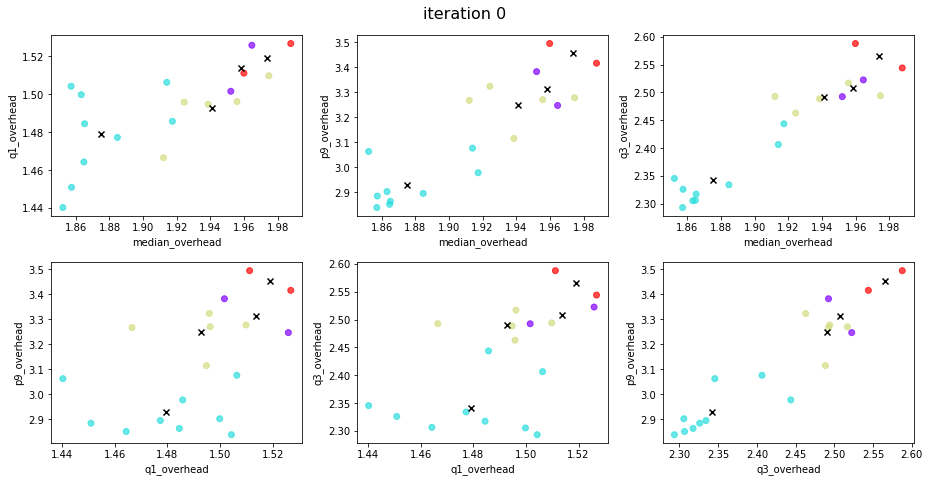

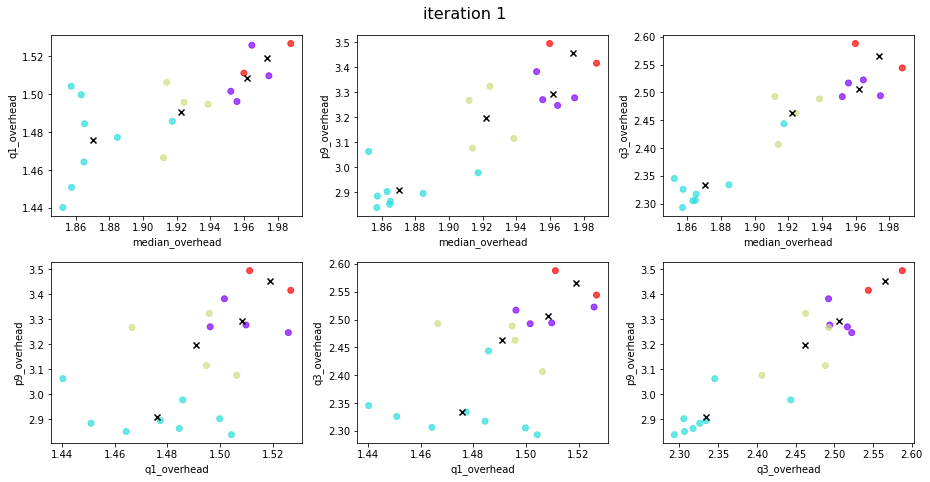

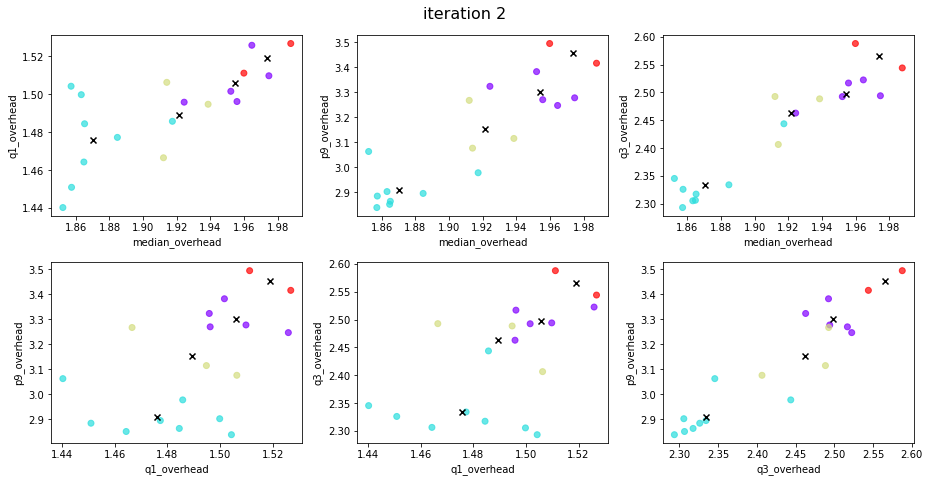

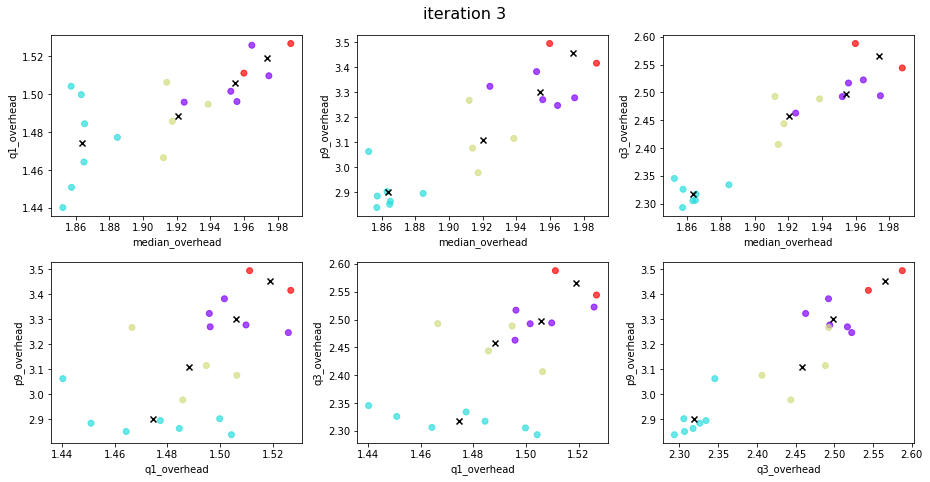

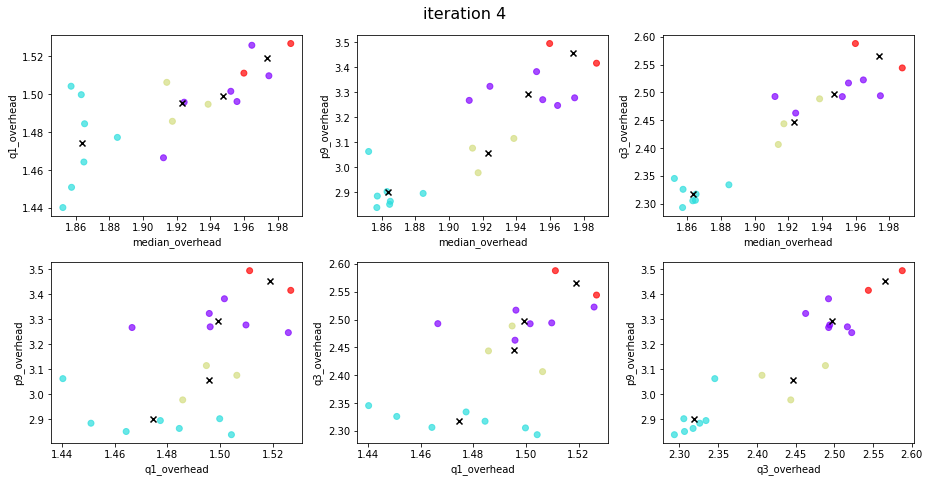

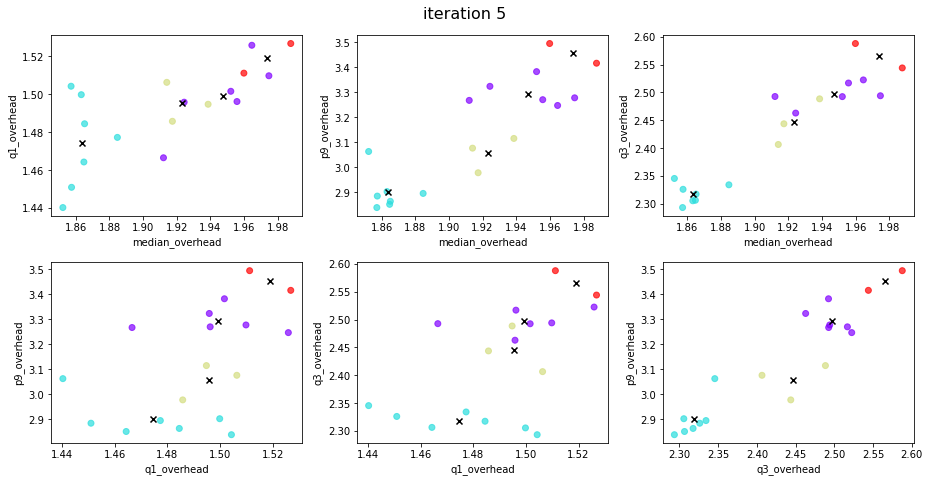

Converged somehow (?) at loop 6


In [11]:
feat_size = len(k_np[0]) - 2
number_of_samples = len(k_np)

centroids_old = np.zeros((k, feat_size))
centroids = np.zeros((k, feat_size))  # means of all the clusters
counts = np.zeros(k) # number of points for each of the cluster

labels_new = np.zeros(number_of_samples)

random_centroids = np.random.choice(number_of_samples, k, replace = False)

# initialize the clusters here
for index in range(k):
    centroids[index] = k_np[random_centroids[index], :-2]

# for loop for max number of iterations:
for iteration in range(100):
# make clusters    
    centroids_old = copy.deepcopy(centroids)
    
    #distances of each of the samples to each cluster
    distance_instance_to_clusters = np.zeros((number_of_samples, k))
    for instance in range(number_of_samples):
        for cluster in range(k):
            distance_instance_to_clusters[instance, cluster] = euclidean_distance(k_np[instance, :-2],centroids[cluster])
        # choose closets cluster for that instance
        labels_new[instance] = np.argmin(distance_instance_to_clusters[instance])
        
# update centroids
    for i in range(k):
        clusters = k_np[labels_new==i, :-2]
        centroids[i] = np.mean(clusters, axis=0)

# plot each iteration for debugging
    plot_iteration(k_np, labels_new, centroids, iteration)
    
# check if converged
    centroid_distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(k)]
    if sum(centroid_distances) == 0:
        print(f'Converged somehow (?) at loop {iteration+1}')
        break
        
    

In [12]:
labels = copy.deepcopy(labels_new)
old_data = copy.deepcopy(k_np)

In [13]:
labels_dict = {}
labels_dict[f'fit_1'] = labels

In [14]:
list_of_nmpys_for_graphs = []
list_of_nmpys_for_graphs.append(old_data)

In [15]:
len(list_of_dfs_rest[0])

labels_for_plotting = np.zeros(26)


In [16]:
counter = 2
s = get_sil_score(old_data[:, :-2], labels_dict[f'fit_1'])
print(s)
for set_df in list_of_dfs_rest:
    new_data = set_df
    for index in range(len(new_data)):
        label, centroids, counts = add_new_instance(centroids, counts, k, new_data[index, :-2])
        labels = np.append(labels, label)
        old_data = np.append(old_data, new_data[index].reshape(1,-1), axis=0)
    
    labels_dict[f'fit_{counter}'] = predict(centroids,old_data)
    list_of_nmpys_for_graphs.append(old_data)
#     plot_progress(old_data, labels_dict[f'fit_{counter}'], counter, centroids)
    s = get_sil_score(old_data[:, :-2], labels_dict[f'fit_{counter}'])
    print(s)
    counter+=1

0.49880622781887557
0.4927676167868227
0.5647836147822992
0.543085818018802
0.5544661847609162
0.5359540594940946
0.49478299889684213
0.5126271538776687


In [17]:
get_sil_score(list_of_nmpys_for_graphs[-1], labels_dict[f'fit_{counter-1}'])

0.2965635103285246

Text(0.5, 1.0, 'k = 4')

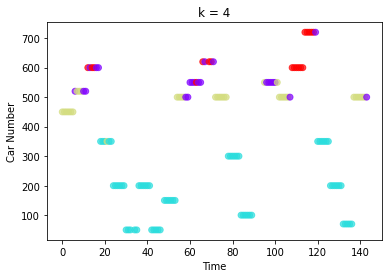

In [18]:
plt.scatter(list_of_nmpys_for_graphs[-1][:, 5], list_of_nmpys_for_graphs[-1][:, 4], c =labels_dict[f'fit_{counter-1}'], cmap='rainbow', alpha=0.7 )
plt.ylabel('Car Number')
plt.xlabel('Time')
plt.title('k = 4')

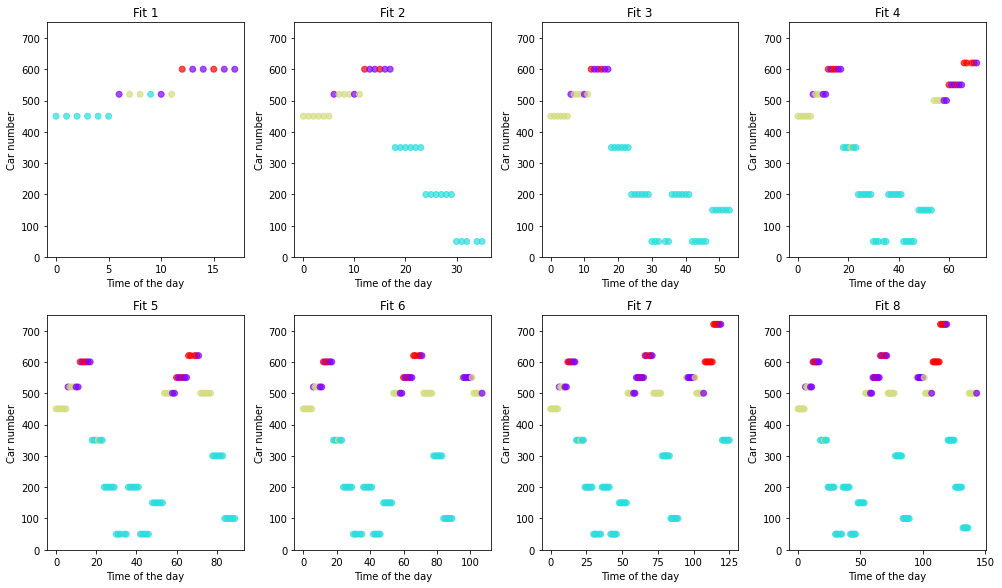

In [19]:
col_counter = 0
row_counter = 0

fit_number = 1

nrows = 2
ncols = 4

figure, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(14,9))

for i in list_of_nmpys_for_graphs:
    
#     numpy_array = i.to_numpy()
    
    figure.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    axs[row_counter,col_counter].scatter(i[:, 5], i[:, 4], c =labels_dict[f'fit_{fit_number}'], cmap='rainbow', alpha=0.7 )
    axs[row_counter,col_counter].set_xlabel('Time of the day')
    axs[row_counter,col_counter].set_ylim(0, 750)
    axs[row_counter,col_counter].set_ylabel('Car number')
    axs[row_counter,col_counter].set_title(f'Fit {fit_number}')
    
#     if fit_number >= 9:
#         axs[row_counter,col_counter].axvline(x=143, color='g')
    if col_counter == (ncols-1):
        col_counter = 0
        row_counter += 1
    else:
        col_counter += 1
    
    fit_number += 1

In [20]:
list_of_dfs_rest_2 = data_split_modified_z_12[8:]

In [21]:
for set_df in list_of_dfs_rest_2:
    new_data = set_df
    for index in range(len(new_data)):
        label, centroids, counts = add_new_instance(centroids, counts, k, new_data[index, :-2])
        labels = np.append(labels, label)
        old_data = np.append(old_data, new_data[index].reshape(1,-1), axis=0)
    
    labels_dict[f'fit_{counter}'] = predict(centroids,old_data)
    list_of_nmpys_for_graphs.append(old_data)
#     plot_progress(old_data, labels_dict[f'fit_{counter}'], counter, centroids)
    s = get_sil_score(old_data[:, :-2], labels_dict[f'fit_{counter}'])
    print(s)
    counter+=1

0.5680520475244759
0.5540807563473967
0.5359055184389843
0.5169857442728347
0.5307968491862104
0.5539356467741213
0.5759789854361879
0.5926745000919416


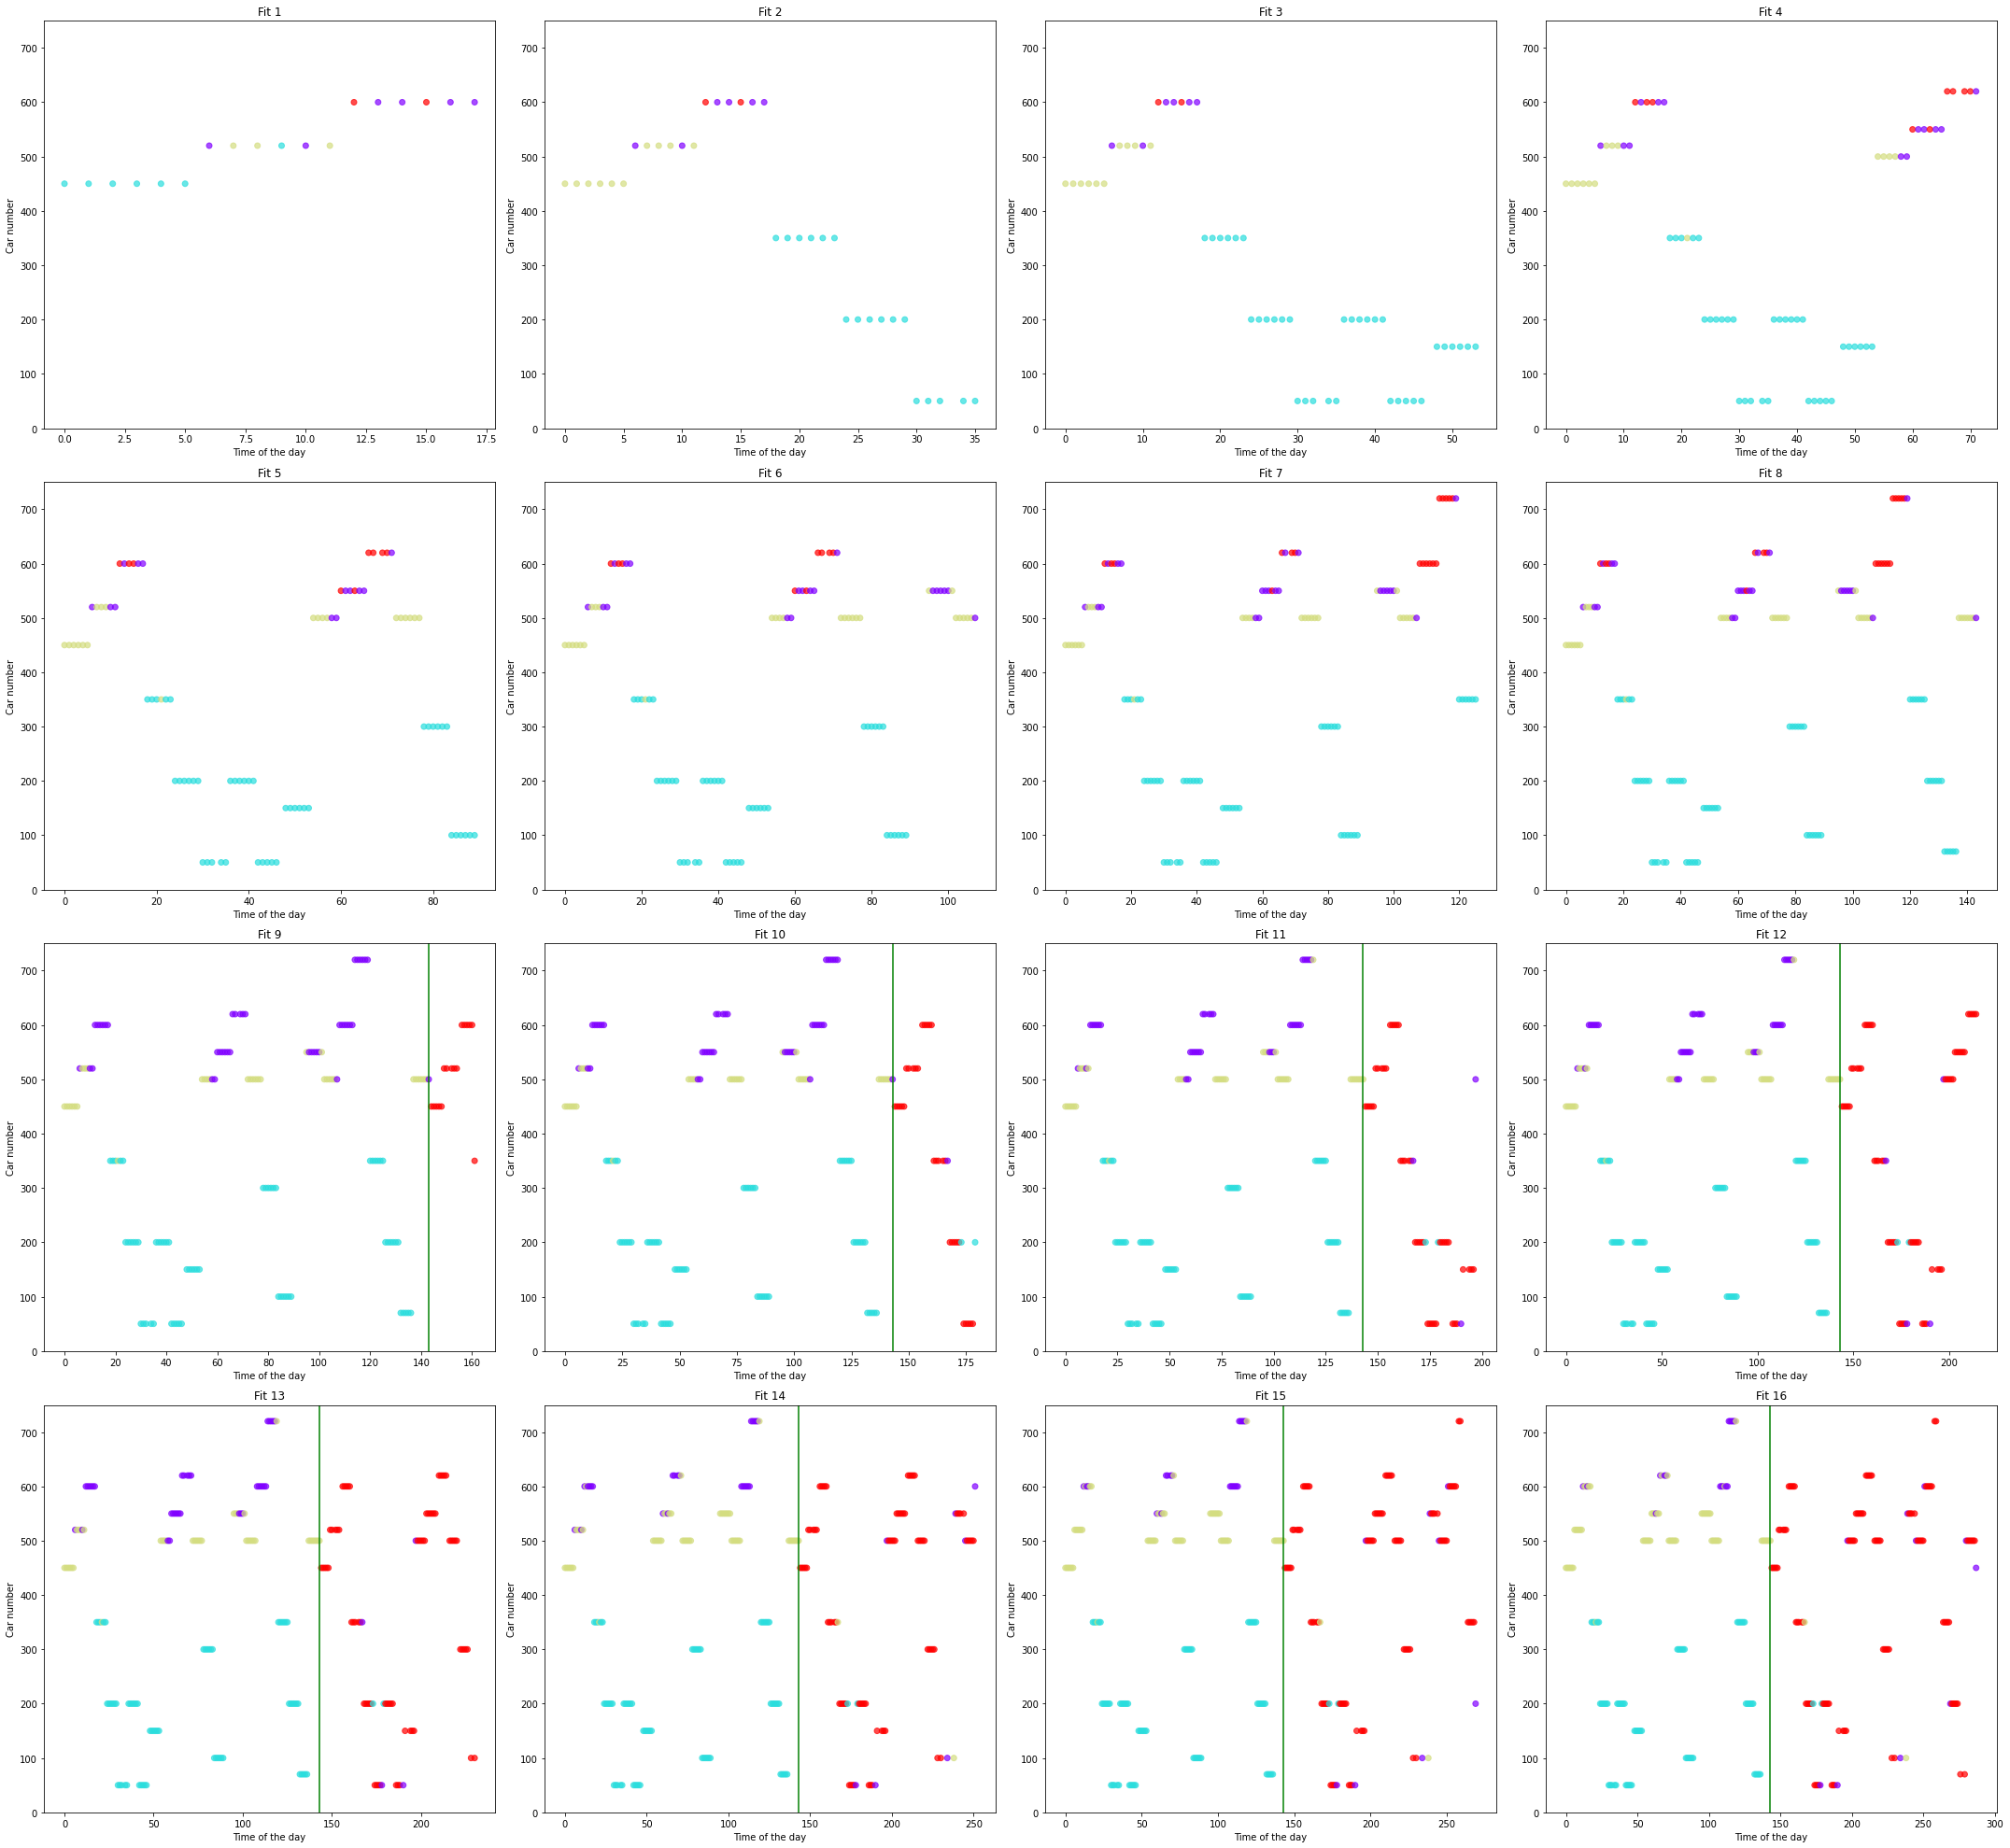

In [22]:
col_counter = 0
row_counter = 0

fit_number = 1

nrows = 4
ncols = 4

figure, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(30,30))

for i in list_of_nmpys_for_graphs:
    
#     numpy_array = i.to_numpy()
    
    figure.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    axs[row_counter,col_counter].scatter(i[:, 5], i[:, 4], c =labels_dict[f'fit_{fit_number}'], cmap='rainbow', alpha=0.7 )
    axs[row_counter,col_counter].set_xlabel('Time of the day')
    axs[row_counter,col_counter].set_ylim(0, 750)
    axs[row_counter,col_counter].set_ylabel('Car number')
    axs[row_counter,col_counter].set_title(f'Fit {fit_number}')
    
    if fit_number >= 9:
        axs[row_counter,col_counter].axvline(x=143, color='g')
    if col_counter == (ncols-1):
        col_counter = 0
        row_counter += 1
    else:
        col_counter += 1
    
    fit_number += 1

In [23]:
get_sil_score(list_of_nmpys_for_graphs[-1], labels_dict[f'fit_{counter-1}'])

0.1450604702902405

Text(0.5, 1.0, 'k = 2')

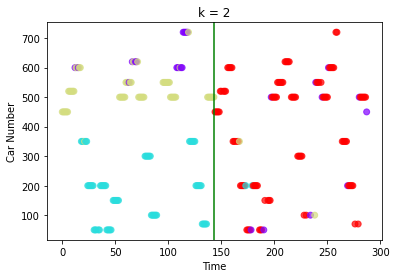

In [24]:
plt.scatter(list_of_nmpys_for_graphs[-1][:, 5], list_of_nmpys_for_graphs[-1][:, 4], c =labels_dict[f'fit_{counter-1}'], cmap='rainbow', alpha=0.7 )
plt.ylabel('Car Number')
plt.xlabel('Time')
plt.axvline(x=143, color='g')
plt.title('k = 2')